<a href="https://colab.research.google.com/github/SergioaA64/SergioaA64/blob/main/05-D6_Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Relatório Final à disciplina de Estatística Descritiva (D6)
# Aluno: Thiago Mendes Rodrigues
#
# Problema: Engajamento do Setor Público à Integridade
# Os dados foram extraídos de fontes distintas:
## (1) "Relatório Diário - Pesquisa com Servidores Públicos Federais sobre Integridade Pública",
## consolidado e disponibilizado sob forma de PDF às unidades de gestão da integridade pela
## Coordenação-Geral de Integridade-Pública, da CGU, na posição de 30 ago. 2021; e
## (2) Portal da Transparência: Detalhamento dos Servidores Públicos por Órgão (os dados coletados
## referem-se ao número de servidores ativos por órgão ou entidade de exercício).
#
# Contextualização do Problema: É um problema relativamente simples que diz respeito à forma de
# apresentação de uma pesquisa sobre Integridade conduzida pela CGU. Os órgãos e entidades respondentes
# são alinhados em ordem decrescente diariamente a partir do número absoluto de respostas.
# Essa arbodagem desconsidera a relação com o número de servidores ativos em exercício na unidade "avaliada".
#
# Método: Para amenizar os efeitos da distorção supracitada, e tentar medir o "engajamento" setorial
# (aproximação didática), criei uma planilha manualmente no GitHub e a referenciei como "dados",
# e então elaborei uma divisão simples entre o número de servidores ativos em
# exercício pelo número de respostas. Dispus ainda a dispersão dessa relação com cada órgão (CGU) e
# entidade, para avaliar se há padrão. A população escolhica foram os grupos "agências reguladoras",
# "autarquias de desenvolvimento regional" e "CGU", cuja inclusão nesse recorte específico se dá apenas
# para facilitar eventual comparação entre as entidades e o órgão que lidera o tema no Brasil.

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/thfev/Dados/main/D6%20-%20Integridade%20-%20P%C3%A1gina1.csv')
dados.head()

,Data,Tipo,Nome,Resposta,Servidores
0,30/08,Agencia,ANATEL,280,1507
1,30/08,Agencia,ANS,147,762
2,30/08,Agencia,ANTT,118,1207
3,30/08,Agencia,ANA,64,365
4,30/08,Agencia,ANCINE,46,433


In [ ]:
dados.describe()


,Resposta,Servidores
count,16.000000,16.000000
mean,95.687500,853.250000
std,127.756393,606.975178
min,1.000000,87.000000
25%,21.500000,409.250000
50%,41.000000,744.000000
75%,122.000000,1265.000000
max,489.000000,2041.000000


In [ ]:
#
#
dados['Rel %'] = round((dados['Resposta'] / dados['Servidores']) * 100, 2)
dados

,Data,Tipo,Nome,Resposta,Servidores,Rel %
0,30/08,Agencia,ANATEL,280,1507,18.58
1,30/08,Agencia,ANS,147,762,19.29
2,30/08,Agencia,ANTT,118,1207,9.78
3,30/08,Agencia,ANA,64,365,17.53
4,30/08,Agencia,ANCINE,46,433,10.62
5,30/08,Agencia,ANTAQ,36,424,8.49
6,30/08,Agencia,ANM,23,1079,2.13
7,30/08,Agencia,ANEEL,17,726,2.34
8,30/08,Agencia,ANVISA,14,1808,0.77
9,30/08,Agencia,ANP,3,936,0.32


In [ ]:
#
#
dados['Rel Final'] = dados['Nome'] + ' = ' + dados['Rel %'].astype('str') + '%'
dados

,Data,Tipo,Nome,Resposta,Servidores,Rel %,Rel Final
0,30/08,Agencia,ANATEL,280,1507,18.58,ANATEL = 18.58%
1,30/08,Agencia,ANS,147,762,19.29,ANS = 19.29%
2,30/08,Agencia,ANTT,118,1207,9.78,ANTT = 9.78%
3,30/08,Agencia,ANA,64,365,17.53,ANA = 17.53%
4,30/08,Agencia,ANCINE,46,433,10.62,ANCINE = 10.62%
5,30/08,Agencia,ANTAQ,36,424,8.49,ANTAQ = 8.49%
6,30/08,Agencia,ANM,23,1079,2.13,ANM = 2.13%
7,30/08,Agencia,ANEEL,17,726,2.34,ANEEL = 2.34%
8,30/08,Agencia,ANVISA,14,1808,0.77,ANVISA = 0.77%
9,30/08,Agencia,ANP,3,936,0.32,ANP = 0.32%


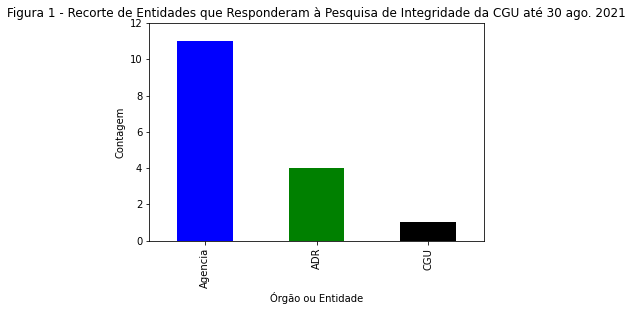

In [ ]:

fig , ax = plt.subplots()
dados["Tipo"].value_counts().plot.bar(color=["blue","green", "black"])
ax.set_ylabel("Contagem")
ax.set_xlabel("Órgão ou Entidade")
ax.set_title("Figura 1 - Recorte de Entidades que Responderam à Pesquisa de Integridade da CGU até 30 ago. 2021")
ax.set_ylim(0,12)
plt.show()

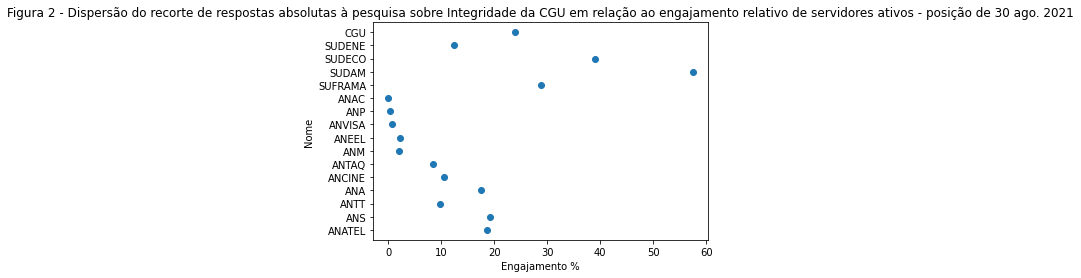

In [ ]:
# Ao final, as interpretações possíveis são de que: (1) as agências reguladoras mostram certo padrão entre o
# levantamento de respostas absolutas e a relação com servidores ativos em exercício; (2) o mesmo não se
# observa entre as ADR (autarquias de desenv. regional); e (3) até agora, a pesquisa aponta, que em termos
# relativos, apenas SUDAM, SUDECO e SUFRAMA superam a CGU no "Engajamento à Integridade".
#
# As dificuldades enfrentadas se relacionam com as bases de dados disperas, desatualizadas ou não-dispostas em
# formato aberto.
#
# A expectativa é que esse tipo de exercício relacional possa servir como insumo ao aprimoramento de 
# futuras novas abordagens e pesquisas sobre o tema. 

fig, ax = plt.subplots()
ax.scatter(dados['Rel %'],dados['Nome'])
ax.set_xlabel('Engajamento %')
ax.set_ylabel('Nome')
ax.set_title('Figura 2 - Dispersão do recorte de respostas absolutas à pesquisa sobre Integridade da CGU em relação ao engajamento relativo de servidores ativos - posição de 30 ago. 2021')
plt.show()